# 画像の算術演算
## 目的
* 画像の算術演算(足し算，引き算，ビット演算など)を学ぶ
* 次の関数を学ぶ :<A HREF="http://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=cv2.add#cv2.add" target="_blank">cv2.add()</A>, <A HREF="http://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=cv2.add#cv2.addWeighted" target="_blank">cv2.addWeighted()</A>

## 画像の足し算
画像の足し算は，OpenCVの関数 [cv2.add(src1, src2[, dst[, mask[, dtype]]])](http://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=cv2.add#cv2.add) を使う，もしくはNumpyの演算によって res = img1 + img2 とする。ここでimg2はスカラーか、2つの画像(img1, img2)がビット数もデータ型も同じでなければならない。

<font color="blue">Note</font>:  OpenCVの足し算とNumpyの足し算は違いがある。OpenCVの `cv2.add()` 関数を使った場合，上限値を超える和の値は `res = min(img1+img2, MAX)`のように打ち切られる．それに対し、Numpyの足し算は和に対し、MAXでモジュロを取った値になる: `res = (img1+img2) mod MAX`

例によって違いを理解しよう:

In [2]:
import numpy as np
import cv2

x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y)) # 250+10 = 260 => 255

[[255]]


In [3]:
print(x+y)         # 250+10 = 260 % 256 = 4

[4]


この現象は2枚の画像を足し合わせた時によりはっきり確認できる．OpenCVの足し算を使った方がよい結果になることが多いので、OpenCVの関数を使う方が良い．

## 画像の混合(ブレンド)
画像の混合とは基本的に画像の足し算のことであるが，それぞれの画像に異なる重み付けをして足し算するため、画像を混ぜあわせたり透明感を出したりしているような感じが得られる．画像の混合は次のように計算される :

$g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x)$

ここで、上の式の $\alpha$ の値を  $0 \rightarrow 1$ に徐々に変えていくと，画像 $f_{0}$ からもう一つの画像 $f_{1}$ に段々と変化させることができる．

ここでは2枚の画像を混合させた．1枚目の画像の重みを0.7、2枚目の画像の重みを0.3に設定し， <A HREF="http://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html?highlight=cv2.add#cv2.addWeighted" target="_blank">cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])</A> 関数を使って以下の計算を行っている．

$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$

なお次のコードでは  $\gamma$の値を0に設定している: (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_core/py_image_arithmetics/ml.png">ml.png</A>, <A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_core/py_image_arithmetics/opencv_logo.png">opencv_logo.png</A>)

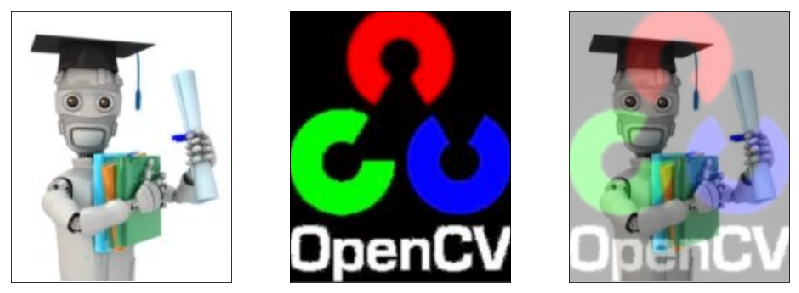

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv_logo.png')

rows,cols,channels = img1.shape
img2 = cv2.resize(img2, (cols,rows))
##  img1とimg2が同じサイズでないとaddWeightedはエラーとなるため

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(15,5))
plt.subplot(1,3,1),plt.imshow(img1)
plt.xticks([]),plt.yticks([]),plt.subplots_adjust(wspace=0)
plt.subplot(1,3,2),plt.imshow(img2)
plt.xticks([]),plt.yticks([]),plt.subplots_adjust(wspace=0)
plt.subplot(1,3,3),plt.imshow(dst)
plt.xticks([]),plt.yticks([])

plt.show()

## ビット単位の処理
OpenCVが提供するビット単位の処理には AND, OR, NOT とXORがある．これらの関数は，(後に紹介するように)画像の中から特定の領域を抽出する時や矩形「でない」形の注目領域を定義したり処理する時などに特に役に立つ．以下の例では画像の特定領域だけを変える方法を示す．

この例では画像上にOpenCVのロゴを表示したい．2枚の画像を単純に足し算するとロゴの色が変わってしまうし，混合するとロゴが透けてしまう。ここではロゴを元画像を保ったまま半透明表示させたい．ロゴの領域が長方形であれば注目領域(ROI)を指定するだけで済むが，OpenCVのロゴはそうではない． そこでこのような時はビット単位での処理を用いる: (使用する画像: [messi5.jpg](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/messi5.jpg), [opencv_logo.png](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_core/py_image_arithmetics/opencv_logo.png) )

mask shape = (289, 236)  image1 shape =  (342, 548, 3)


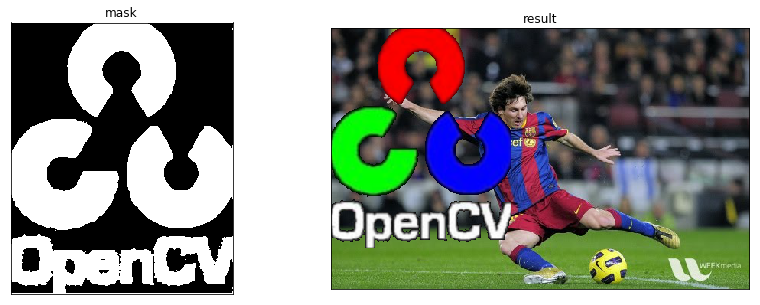

In [31]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# 2つの画像ファイルを読み込む
img1 = cv2.imread('messi5.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
img2 = cv2.imread('opencv_logo.png')

# 左上隅にロゴを表示するのでROIを作成
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# ロゴマスクと、その逆マスクを作る
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# print("img2 = "); print(img2.shape)
# print("roi = "); print(roi.shape)
# print("mask_inv = "); print(mask_inv.shape)

# ROIにおいてロゴ領域を暗転させる
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# ロゴの画像からロゴの領域だけを取り去る
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# ROIにロゴを置き、メインの画像を修正
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

# cv2.imshow('img2gray',img2gray)
# cv2.imshow('mask',mask)
# cv2.imshow('roi',roi)
# cv2.imshow('img2',img2)
#cv2.imshow('img1_bg',img1_bg)
#cv2.imshow('img2_fg',img2_fg)
#cv2.imshow('dst',dst)

print("mask shape =",mask.shape, " image1 shape = ", img1.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1),plt.imshow(mask,cmap='gray') 
plt.xticks([]),plt.yticks([]),plt.title('mask'),plt.subplots_adjust(wspace=0)
plt.subplot(1,2,2),plt.imshow(img1)
plt.xticks([]),plt.yticks([]),plt.title('result')

# plt.imshow(img1)
plt.show()


左がマスク画像で，右が結果の画像である．よりよく理解したければ，最終に至るまでの中間画像(特に `img1_bg`と `img2_fg` )を表示してみるとよいだろう．

## 課題
1. `cv2.addWeighted` 関数を使って2枚の画像の片方の画像からもう片方の画像に滑らかに遷移する画像群を生成せよ．なおこの画像群にシーケンシャルな番号をつけ、`cv2.videoCapture`関数に引数として与えるとスライドショーとして表示することができる(ただし、それにはちょっと工夫が必要. `cv2.VideoCapture()`関数の説明書を読むこと) 。
2. マウスとトラックバーを用いて、2枚の画像の片方の画像からもう片方の画像に滑らかに遷移する画像を表示することを考えよ。ここでは[「カラーパレットとしてのトラックバー 」](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/trackbar.html)で学んだ技法が使われる。

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: 基本の処理<BR> 
画像に対する基本の処理を学ぶ: 画素値の編集，幾何変換，コードの最適化(code optimization)，数学関数など
* 前の学習項目 [画像の基本処理 basicImageproc.ipynb ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/basicImageproc.html) 
画素値の読み取り方，変更方法，画像の特定領域(ROI)の使い方と基本処理を学ぶ．
* 次の学習項目 [コードの性能評価と改善方法  optimization.ipynb ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/optimization.html)<BR>
処理をして結果を得ることは重要だが，最速の方法で結果を得ることはもっと重要．ここでは実装したコードの処理速度の確認方法やコードの最適化等について学ぶ．
